# Description
* You've just joined the data team at an online publishing company. 
* One of your verticals is a food publication. 
* A product manager on your team wants to build a feature for this vertical that enables users to query by cuisine, not just by ingredients. 
* All of your recipes are unlabeled, and it's infeasible to label them by hand.
* Design and execute a method to group the recipes by cuisine. 
* How could you design this to be robust enough to understand similarities / substitutions between ingredients? 
* For each each major cuisine, what are the driving ingredients that characterize it?
* Your product manager indicates a likelihood that you will only need to write a guideline for an outsourced team to hand label the remaining corpus. 
* How would you go about writing this guide for a few major cuisines?

In [443]:
import json 
import ast
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df
import matplotlib.pyplot as plt
import seaborn as sns
import re
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [444]:
df = pd.read_json('C:/Users/Ali/Documents/Insight/Data Challenge/Week6 Confounded Cuisiner/unlabelled_recipies.json')

In [445]:
df.head()

,ingredients
0,"[pepper, bacon, russet potatoes, sugar, onions..."
1,"['rib', 'carrots', 'leeks', 'unsalted butter',..."
10,"[orzo, garlic, heavy cream, white wine, spinac..."
100,"['garlic', 'ginger', 'fish sauce', 'chayotes',..."
1000,"[onions, avocado, salt, coconut cream, cumin s..."


In [446]:
print(df['ingredients'][1], type(df['ingredients'][1]))

['rib', 'carrots', 'leeks', 'unsalted butter', 'finely chopped onion', 'baking potatoes', 'dry white wine', 'half & half', 'water', 'bay leaf', 'dried thyme', 'chicken broth', 'saffron threads'] <class 'str'>


In [447]:
 df['ingredients'][1] = ast.literal_eval(df['ingredients'][1])

In [448]:
for i in range(len(df['ingredients'])):
    if type(df['ingredients'][i]) == str:
        df['ingredients'][i] = ast.literal_eval(df['ingredients'][i])

In [449]:
type(df['ingredients'][1])

list

In [450]:
df.head()

,ingredients
0,"[pepper, bacon, russet potatoes, sugar, onions..."
1,"[rib, carrots, leeks, unsalted butter, finely ..."
10,"[orzo, garlic, heavy cream, white wine, spinac..."
100,"[garlic, ginger, fish sauce, chayotes, cooking..."
1000,"[onions, avocado, salt, coconut cream, cumin s..."


In [451]:
df_clean = df.reset_index(drop=True)
for i in range(0,len(df_clean.index)):
    row=df_clean[df_clean.columns[0]][i]
    if type(row)==str:
        df_clean[df_clean.columns[0]][i] = row.replace("'","").replace('[','').replace(']','').split(",")

In [452]:
df_clean.head()

,ingredients
0,"[pepper, bacon, russet potatoes, sugar, onions..."
1,"[rib, carrots, leeks, unsalted butter, finely ..."
2,"[orzo, garlic, heavy cream, white wine, spinac..."
3,"[garlic, ginger, fish sauce, chayotes, cooking..."
4,"[onions, avocado, salt, coconut cream, cumin s..."


In [453]:
df_clean["ingredients_manip"] = df_clean["ingredients"].apply(lambda x:(",".join(x)))

In [454]:
df_clean.head()

,ingredients,ingredients_manip
0,"[pepper, bacon, russet potatoes, sugar, onions...","pepper,bacon,russet potatoes,sugar,onions,goch..."
1,"[rib, carrots, leeks, unsalted butter, finely ...","rib,carrots,leeks,unsalted butter,finely chopp..."
2,"[orzo, garlic, heavy cream, white wine, spinac...","orzo,garlic,heavy cream,white wine,spinach,egg..."
3,"[garlic, ginger, fish sauce, chayotes, cooking...","garlic,ginger,fish sauce,chayotes,cooking oil,..."
4,"[onions, avocado, salt, coconut cream, cumin s...","onions,avocado,salt,coconut cream,cumin seed,t..."


In [465]:
df_clean["ingredients_manip2"] = df_clean["ingredients_manip"].apply(lambda x:(x.replace(" ","-")))

In [466]:
df_clean.head()

,ingredients,ingredients_manip,ingredients_manip2
0,"[pepper, bacon, russet potatoes, sugar, onions...","pepper,bacon,russet potatoes,sugar,onions,goch...","pepper,bacon,russet-potatoes,sugar,onions,goch..."
1,"[rib, carrots, leeks, unsalted butter, finely ...","rib,carrots,leeks,unsalted butter,finely chopp...","rib,carrots,leeks,unsalted-butter,finely-chopp..."
2,"[orzo, garlic, heavy cream, white wine, spinac...","orzo,garlic,heavy cream,white wine,spinach,egg...","orzo,garlic,heavy-cream,white-wine,spinach,egg..."
3,"[garlic, ginger, fish sauce, chayotes, cooking...","garlic,ginger,fish sauce,chayotes,cooking oil,...","garlic,ginger,fish-sauce,chayotes,cooking-oil,..."
4,"[onions, avocado, salt, coconut cream, cumin s...","onions,avocado,salt,coconut cream,cumin seed,t...","onions,avocado,salt,coconut-cream,cumin-seed,t..."


Remove any digit kept as string: this must be done before tfidf step

In [468]:
for i in range(len(df_clean['ingredients_manip2'])):
    df_clean['ingredients_manip2'][i] = ''.join([x for x in df_clean['ingredients_manip2'][i] if not x.isdigit()])

In [541]:
'00' in tf.vocabulary_.keys()

False

In [469]:
df_clean.head()

,ingredients,ingredients_manip,ingredients_manip2
0,"[pepper, bacon, russet potatoes, sugar, onions...","pepper,bacon,russet potatoes,sugar,onions,goch...","pepper,bacon,russet-potatoes,sugar,onions,goch..."
1,"[rib, carrots, leeks, unsalted butter, finely ...","rib,carrots,leeks,unsalted butter,finely chopp...","rib,carrots,leeks,unsalted-butter,finely-chopp..."
2,"[orzo, garlic, heavy cream, white wine, spinac...","orzo,garlic,heavy cream,white wine,spinach,egg...","orzo,garlic,heavy-cream,white-wine,spinach,egg..."
3,"[garlic, ginger, fish sauce, chayotes, cooking...","garlic,ginger,fish sauce,chayotes,cooking oil,...","garlic,ginger,fish-sauce,chayotes,cooking-oil,..."
4,"[onions, avocado, salt, coconut cream, cumin s...","onions,avocado,salt,coconut cream,cumin seed,t...","onions,avocado,salt,coconut-cream,cumin-seed,t..."


In [470]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(df_clean['ingredients_manip2'])
txt_transformed = txt_fitted.transform(df_clean['ingredients_manip2'])


In [471]:
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['salt' 'oil' 'pepper']

Features with highest idf:
['licor' 'crabapples' 'flake']


In [474]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))

In [475]:
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight.head(20)

,token,weight
544,chimichurri,11.590969
1868,orchid,11.590969
1854,olie,11.590969
623,colada,11.590969
1847,ogura,11.590969
1844,ocean,11.590969
1833,nuggets,11.590969
631,colman,11.590969
1832,nugget,11.590969
633,colorado,11.590969


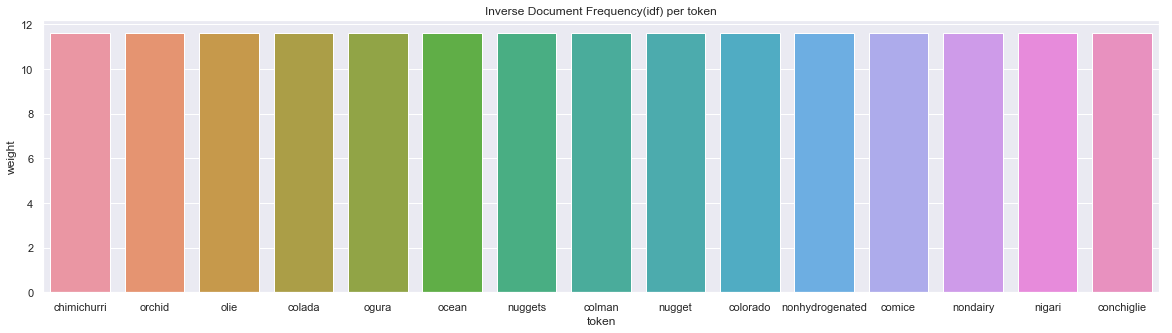

In [476]:
sns.barplot(x='token', y='weight', data=token_weight.head(15))            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(20,5)
plt.show()

In [486]:
k_dict = {}

In [487]:
for k in range (1, 13):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(txt_transformed)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_    
# Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    k_dict[k] = interia
    print( "k:",k, " cost:", interia)

k: 1  cost: 13321544.521256834
k: 2  cost: 13104453.308375783
k: 3  cost: 12922433.447234403
k: 4  cost: 12779706.26248348
k: 5  cost: 12659435.963478243
k: 6  cost: 12565002.408997254
k: 7  cost: 12479528.462519528
k: 8  cost: 12413724.99741085
k: 9  cost: 12349549.648292325
k: 10  cost: 12289353.38323321
k: 11  cost: 12243786.502221232
k: 12  cost: 12195122.272646822


In [485]:
import pickle
f = open('C:/Users/Ali/Documents/Insight/Data Challenge/Week6 Confounded Cuisiner/k_dict.pkl', 'wb')
pickle.dump(k_dict, f)
f.close()

In [497]:
type(list(k_dict.keys()))

list

(12100000.0, 13330000.0)

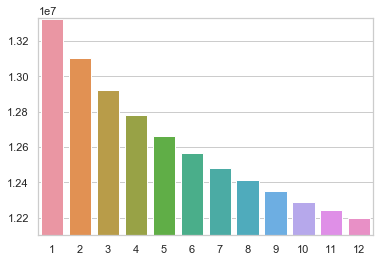

In [515]:
sns.set(style="whitegrid")
ax = sns.barplot(list(k_dict.keys()), list(k_dict.values()))
import matplotlib.pyplot as plt
plt.ylim(1.21e7, 1.333e7)

In [543]:
for k in k_dict.keys():
    if k == 1:
        continue
    else:
        print("cluster count: %2d, dispersion: %10.2f, perc dispersion change w.r.t. previous cluster count: %2.2f" % 
             (k, k_dict[k], 100*(k_dict[k] / k_dict[k-1] - 1)))

cluster count:  2, dispersion: 13104453.31, perc dispersion change w.r.t. previous cluster count: -1.63
cluster count:  3, dispersion: 12922433.45, perc dispersion change w.r.t. previous cluster count: -1.39
cluster count:  4, dispersion: 12779706.26, perc dispersion change w.r.t. previous cluster count: -1.10
cluster count:  5, dispersion: 12659435.96, perc dispersion change w.r.t. previous cluster count: -0.94
cluster count:  6, dispersion: 12565002.41, perc dispersion change w.r.t. previous cluster count: -0.75
cluster count:  7, dispersion: 12479528.46, perc dispersion change w.r.t. previous cluster count: -0.68
cluster count:  8, dispersion: 12413725.00, perc dispersion change w.r.t. previous cluster count: -0.53
cluster count:  9, dispersion: 12349549.65, perc dispersion change w.r.t. previous cluster count: -0.52
cluster count: 10, dispersion: 12289353.38, perc dispersion change w.r.t. previous cluster count: -0.49
cluster count: 11, dispersion: 12243786.50, perc dispersion chan

* What is the right value of k? there is no perfect answer. 
* However the sum of distances of samples to their closest cluster center does not decrease significantly when the number of clusters is increased from 8 to 9
* Using the resulting clusters, the chef can look at the recipes and tag them with respect to the prevailing cuisine